In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [48]:
class DynamicEpsilonGreedyBandit:
    def __init__(self, epsilon, no_ad_slots):
        self.epsilon = epsilon # exploration rate
        self.no_ad_slots = no_ad_slots # number of ad slots i.e. arms
        self.ad_ctr_estimates = np.zeros(no_ad_slots) # estimated CTR for each ad slot
        self.ad_clicks = np.zeros(no_ad_slots) # total clicks for each ad slot
        self.ad_impressions = np.zeros(no_ad_slots) # total impressions for each ad slot

    def select_slot(self):
        """select an as slot using the epsilon-greedy algorithm"""
        if random.uniform(0, 1) < self.epsilon:
            # exploration: choose a random ad slot
            return random.randint(0, self.no_ad_slots - 1)
        else:
            # exploitation: choose ad slot with the highest estimated CTR
            return np.argmax(self.ad_ctr_estimates)
        
    def update_ad_slot(self, selected_slot, reward):
        """update the estimated CTR for the selected ad slot based on the reward"""
        self.ad_impressions[selected_slot] += 1
        self.ad_clicks[selected_slot] += reward

        # update the CTR estimate for the selected ad slot
        self.ad_ctr_estimates[selected_slot] = (
            self.ad_clicks[selected_slot] / self.ad_impressions[selected_slot]
        )

def dynamic_ctr(t, base_ctr):
    """generate a dynamic CTR that changes over time using a sine wave"""
    return base_ctr * (0.8 + 0.4 * np.sin(0.01 * t))

def simulate_dynamic_ad_impressions(epsilon_greedy, base_ad_ctr, no_impressions):
    """simulate the ad impressions and clicks in a dynamic environment"""
    total_clicks = 0
    true_ctr_history = np.zeros((no_impressions, len(base_ad_ctr)))

    for t in range(no_impressions):
        # step 1: get the true CTR for each ad slot at time t (changing over time)
        true_ad_ctr = [dynamic_ctr(t, base) for base in base_ad_ctr]
        true_ctr_history[t] = true_ad_ctr

        # step 2: select an ad slot using epsilon-greedy strategy
        selected_slot = epsilon_greedy.select_slot()

        # step 3: simulate whether a click occurred based on the true CTR
        # of the selected ad slot
        reward = 1 if random.uniform(0, 1) < true_ad_ctr[selected_slot] else 0

        # step 4: update the estimated CTR for the selected ad slot
        epsilon_greedy.update_ad_slot(selected_slot, reward)

        # track total clicks for performance evaluation
        total_clicks += reward

    return total_clicks, true_ctr_history

In [49]:
# parameters for the simulation
epsilon = 0.1   # 10%  chance to explore
no_ad_slots = 4 # we have 4 ad slots i.e. arms
no_impressions = 1000 # simulate 1000 ad impressions

# base true CTE for each ad slot
base_ad_ctr = [0.05, 0.10, 0.08, 0.12] # top banner, sidebar, footer, pop-up

# create and instance of the DynamicEpsilonGreedyBandit
epsilon_greedy_bandit = DynamicEpsilonGreedyBandit(epsilon, no_ad_slots)

# run the simulation in a dynamic environment
total_clicks, true_ctr_history = simulate_dynamic_ad_impressions(epsilon_greedy_bandit, base_ad_ctr, no_impressions)

Total Clicks: 51
Estimated CTR for each ad slot:
Ad Slot 1: Estimated CTR = 0.0451
Ad Slot 2: Estimated CTR = 0.0769
Ad Slot 3: Estimated CTR = 0.0414
Ad Slot 4: Estimated CTR = 0.0793


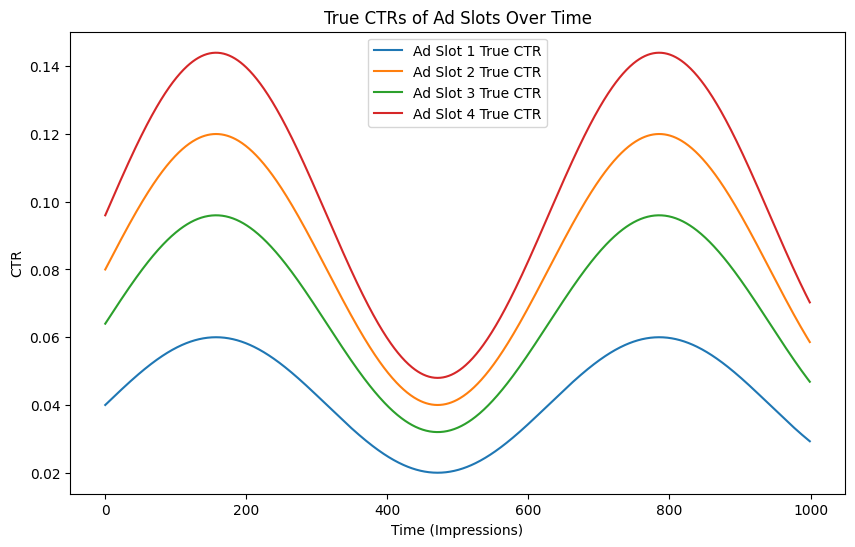

In [50]:
# print results
print(f"Total Clicks: {total_clicks}")
print("Estimated CTR for each ad slot:")
for i, ctr in enumerate(epsilon_greedy_bandit.ad_ctr_estimates):
    print(f"Ad Slot {i + 1}: Estimated CTR = {ctr:.4f}")

# plot the true CTRs over time
plt.figure(figsize=(10,6))
for i in range(no_ad_slots):
    plt.plot(true_ctr_history[:, i], label=f'Ad Slot {i + 1} True CTR')
plt.xlabel('Time (Impressions)')
plt.ylabel('CTR')
plt.title('True CTRs of Ad Slots Over Time')
plt.legend()
plt.show()